In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
out_deg = h5py.File('out_deg.h5', 'r')
print([key for key in out_deg.keys()])
# infec_frac = h5py.File('infec_frac.h5', 'r')
# print([key for key in infec_frac.keys()])
# connec_comps = h5py.File('connec_comps.h5', 'r')
# pd.read_hdf('connec_comps.h5','sim_70_p_rew_0.01_start_10_dq_0.1')

['sim_70_p_rew_0.051_start_10_dq_0.5', 'sim_70_p_rew_0.051_start_20_dq_0.5', 'sim_70_p_rew_0.051_start_30_dq_0.5', 'sim_70_p_rew_0.051_start_40_dq_0.5', 'sim_70_p_rew_0.051_start_50_dq_0.5', 'sim_70_p_rew_0.051_start_60_dq_0.5', 'sim_70_p_rew_0.051_start_70_dq_0.5', 'sim_70_p_rew_0.51_start_10_dq_0.5', 'sim_70_p_rew_0.51_start_20_dq_0.5', 'sim_70_p_rew_0.51_start_30_dq_0.5', 'sim_70_p_rew_0.51_start_40_dq_0.5', 'sim_70_p_rew_0.51_start_50_dq_0.5', 'sim_70_p_rew_0.51_start_60_dq_0.5', 'sim_70_p_rew_0.51_start_70_dq_0.5', 'sim_70_p_rew_0.765_start_10_dq_0.5', 'sim_70_p_rew_0.765_start_20_dq_0.5', 'sim_70_p_rew_0.765_start_30_dq_0.5', 'sim_70_p_rew_0.765_start_40_dq_0.5', 'sim_70_p_rew_0.765_start_50_dq_0.5', 'sim_70_p_rew_0.765_start_60_dq_0.5', 'sim_70_p_rew_0.765_start_70_dq_0.5', 'sim_70_p_rew_10.2_start_10_dq_0.5', 'sim_70_p_rew_10.2_start_20_dq_0.5', 'sim_70_p_rew_10.2_start_30_dq_0.5', 'sim_70_p_rew_10.2_start_40_dq_0.5', 'sim_70_p_rew_10.2_start_50_dq_0.5', 'sim_70_p_rew_10.2_star

## Infected Fraction

In [9]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,95) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

#     sampling_average = np.ones(shape=np.shape(count_deg))
    i = 20000
#     for i in range(df.shape[1]-100, df.shape[1]) :
    sampling_average = np.mean(np.mean([item[:,i-100:i] for item in sampling],axis=0),axis=1)

        
    return sampling_average

#### Infected Fraction Sampling Average

[0.50466]
[0.595792]
[0.542136]
[0.34036]
[0.195816]
[0.328416]
[0.566472]
[0.629664]
[0.594804]
[0.416004]
[0.392792]
[0.379864]
[0.548044]
[0.639276]
[0.620508]
[0.573448]
[0.441092]
[0.523612]
[0.503812]
[0.628464]
[0.658404]
[0.577424]
[0.465536]
[0.528332]
[0.568652]
[0.637028]
[0.641656]
[0.553464]
[0.5041]
[0.55624]
[0.359184]
[0.624216]
[0.624664]
[0.563872]
[0.517168]
[0.55964]
[0.520164]
[0.61074]
[0.627812]
[0.578856]
[0.50968]
[0.555396]


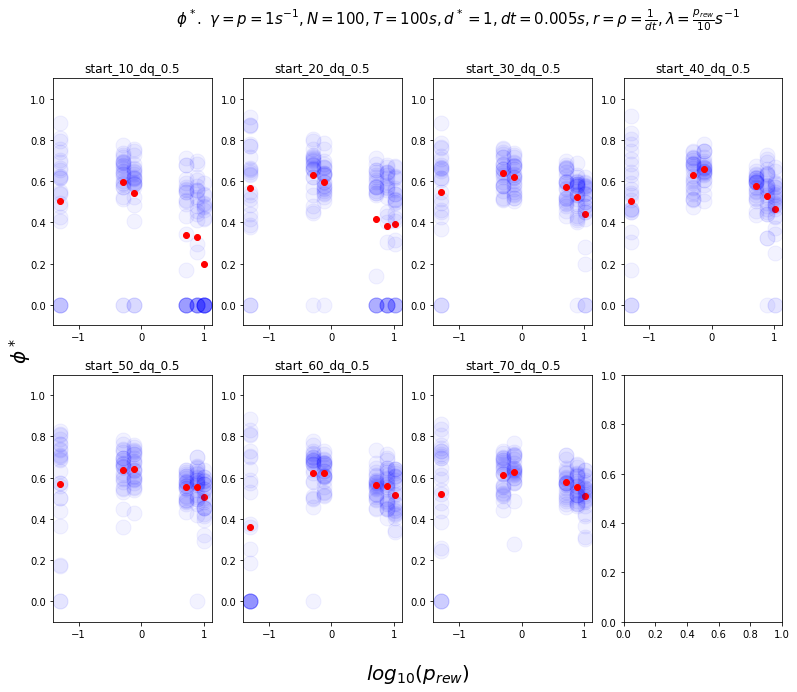

In [10]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.005)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

N = 100
rew_r = 25
density = 1/N
# vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
# p_rew_vals = [0.051,0.255,0.51,2.55,5.1,10.2,12.75,15.3,17.85,20.4]
vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [0.051,0.51,0.765,5.1,10.2,7.65]
start_vals = [10,20,30,40,50,60,70]
dose_quantity_vals = [0.5]

d = 0
counter = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
b = 0
n = 0
m = 0
while b < 7 :
    if b == 4 :
        n = 1
        m = 0
    for a in range(len(p_rew_vals)) :
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title_title = 'start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        ax[n,m].set_title(key_half_title_title)
        ax[n,m].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        print(sampling_average)
        sampling_average_list_infected.append(sampling_average)
        for i in range(70,95) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            j = 20000
            average = np.mean(count_deg[:,j-100:j],axis=1)
            im = ax[n,m].plot(np.log10(p_rew_vals[a]),average,'b.',markersize=30,alpha = 0.05)
        im = ax[n,m].plot(np.log10(p_rew_vals[a]),sampling_average,'r.',markersize=12)
    m = m + 1
    b = b + 1
counter = counter + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,dt=0.005s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 15)
nax.set_xlabel(r'$log_{10}(p_{rew})$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("blah.svg", format="svg")

In [15]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,70+10) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


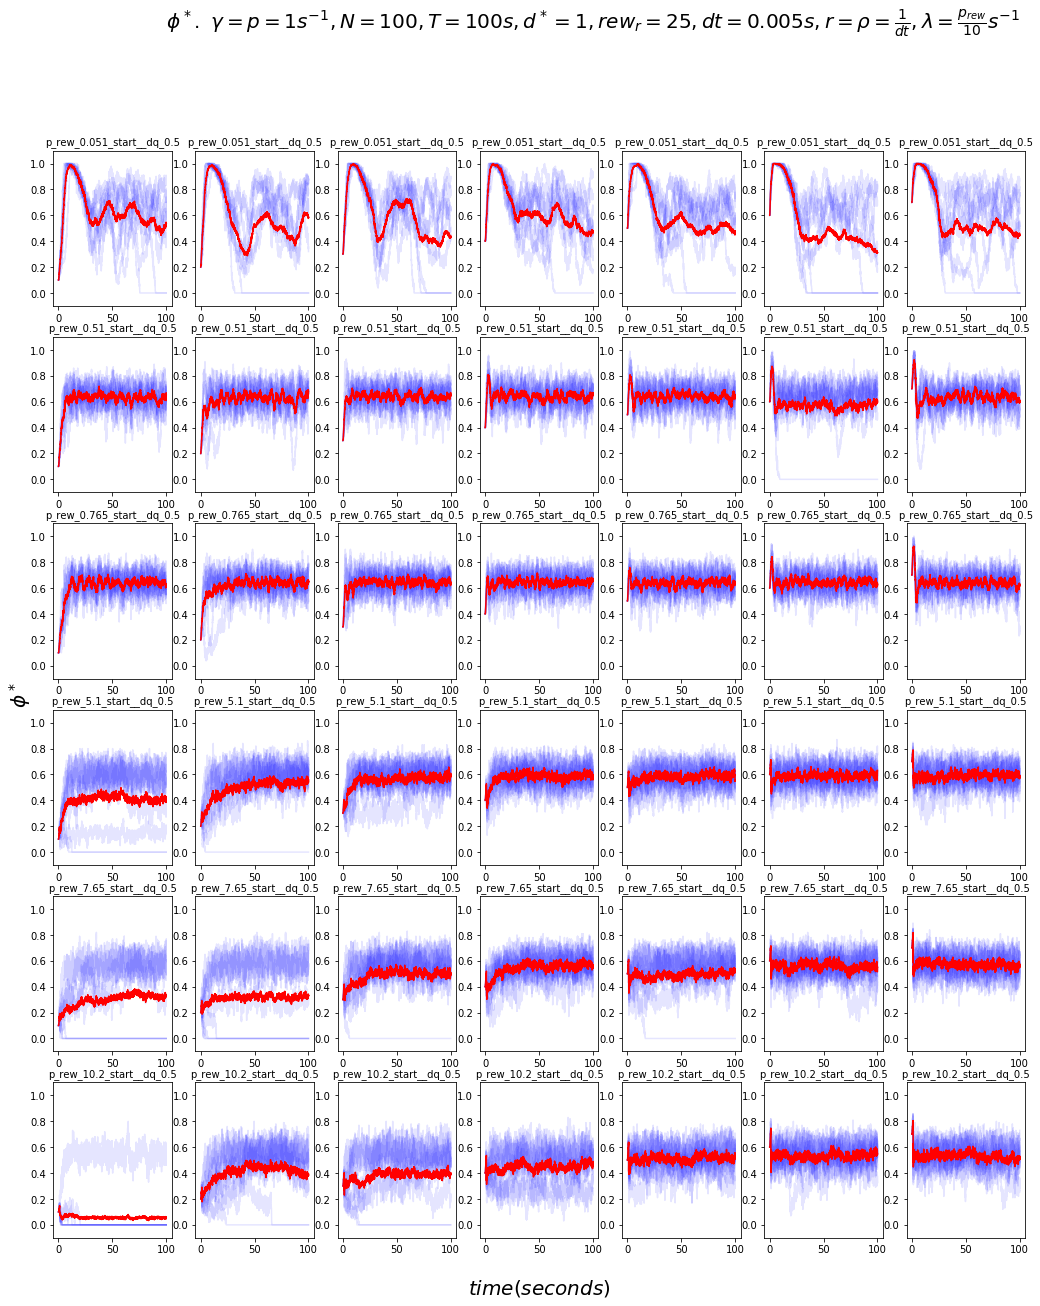

In [16]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.005)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

N = 100
rew_r = 25
density = 1/N
vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [0.051,0.51,0.765,5.1,10.2,7.65]
p_rew_vals.sort()
start_vals = [10,20,30,40,50,60,70]
dose_quantity_vals = [0.5]

counter = 0
fig, ax = plt.subplots(nrows=6, ncols=7, figsize=(20,20))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if b == 7:
            b = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_titles = 'p_rew_'+str(p_rew_vals[a])+'_start_'+'_dq_'+str(dose_quantity_vals[d])
#         if a == 3 :
#             key_half = '_p_rew_51'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        ax[m, n].set_title(key_half_titles,fontsize=10)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        for i in range(70,70+10) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            im = col.plot(x.flatten(),count_deg.flatten(),color='blue',linestyle = '-',alpha = 0.1)
        im = col.plot(x.flatten(),sampling_average.flatten(),color='red',linestyle = '-')
        counter = counter + 1
        n = n + 1
        b = b + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,rew_{r}=25,dt=0.005s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac_all.png", format="png")